In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# Parameters
N = 100.0      # Maximum gain constant
a = 0.1        # Rate constant in gain function
T = 10.0       # Fixed travel time between patches

# Define gain function and its derivative
def g(x):
    return N * (1 - np.exp(-a * x))

def gp(x):
    return a * N * np.exp(-a * x)

# Function whose root gives the optimal x*, i.e., (x+T)*g'(x) - g(x) = 0
def f_opt(x):
    return (x + T) * gp(x) - g(x)

# Solve for x*
x_star = fsolve(f_opt, 10)[0]  # initial guess 10
print("Optimal patch residence time (x*):", x_star)

# Generate x values for plotting starting from -20
x_vals = np.linspace(-20, 3*x_star, 400)
g_vals = g(x_vals)

# Compute tangent line at x_star: y = g(x_star) + g'(x_star)*(x - x_star)
tangent = g(x_star) + gp(x_star) * (x_vals - x_star)

# Plot g(x) and the tangent line
plt.figure(figsize=(8, 6))
plt.plot(x_vals, g_vals, lw=2)
plt.plot(x_vals, tangent, linestyle='--', lw=2)
plt.scatter([x_star], [g(x_star)], color='red', zorder=5, label='Optimal point x*')
plt.xlabel('Foraging time x')
plt.ylabel('Cumulative gain g(x)')
plt.xlim(-10, np.max(x_vals))
plt.ylim(bottom=0)  # y軸の最小値を0に設定
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('ForagingGainAndTangent.pdf', format='pdf')
plt.close()

Optimal patch residence time (x*): 11.461932206205827


In [8]:
# Parameters for prey menu selection
g1 = 10.0
g2 = 5.0
h1 = 0.5
h2 = 1.0
lambda2 = 0.5

# Vary lambda1 in a range
lambda1_vals = np.linspace(0.1, 1.0, 200)
WD = (lambda1_vals * g1 + lambda2 * g2) / (1 + lambda1_vals * h1 + lambda2 * h2)
WG = (lambda1_vals * g1) / (1 + lambda1_vals * h1)

plt.figure(figsize=(8, 6))
plt.plot(lambda1_vals, WD, label='Dabohaze Strategy Efficiency $W_D$', lw=2)
plt.plot(lambda1_vals, WG, label='Gourmet Strategy Efficiency $W_G$', lw=2, linestyle='--')
plt.xlabel('Encounter rate for Type 1 Prey (λ₁)')
plt.ylabel('Foraging Efficiency')
plt.title('Comparison of Prey Menu Selection Strategies')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('PreyMenuSelection.pdf', format='pdf')
plt.close()

In [9]:
# Parameters for dormancy strategy
R = 10.0         # Seed production in a good year
S = 2.0          # Seed production in a bad year
p_good = 0.6     # Probability of a good year

# Theoretical optimal dormancy rate
x_star_dorm = (p_good * R) / (R - S)
x_star_dorm = np.clip(x_star_dorm, 0, 1)
print("Theoretical optimal dormancy rate x*:", x_star_dorm)

# Range of dormancy rates (x: fraction of seeds remaining dormant)
x_vals_dorm = np.linspace(0, 1, 400)
M_good = x_vals_dorm + (1 - x_vals_dorm) * R
M_bad = x_vals_dorm + (1 - x_vals_dorm) * S
lnW = p_good * np.log(M_good) + (1 - p_good) * np.log(M_bad)

plt.figure(figsize=(8, 6))
plt.plot(x_vals_dorm, lnW, label=r'$\ln\bar{W}$', lw=2)
plt.axvline(x=x_star_dorm, color='red', linestyle='--', label='Optimal dormancy rate')
plt.xlabel('Dormancy rate x')
plt.ylabel('Log Geometric Mean Growth Rate')
plt.title('Dormancy Strategy: Growth Rate vs. Dormancy Rate')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('DormancyStrategy.pdf', format='pdf')
plt.close()

Theoretical optimal dormancy rate x*: 0.75


Theoretical optimal sex ratio (proportion of sons) x*: 0.475


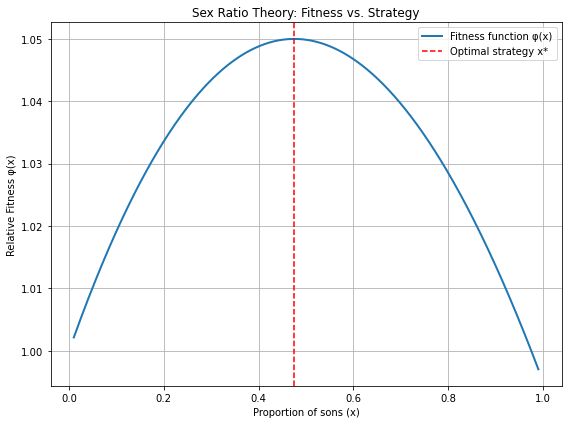

In [10]:
# Parameters for sex ratio theory
n = 20
x_star_sex = (n - 1) / (2 * n)
print("Theoretical optimal sex ratio (proportion of sons) x*:", x_star_sex)

# Define mutant mother's fitness function phi(x)
def phi(x, n, x_star):
    return (1 - 2 * x) + (n * x) / (x + (n - 1) * x_star)

x_vals_sex = np.linspace(0.01, 0.99, 400)
phi_vals = phi(x_vals_sex, n, x_star_sex)

plt.figure(figsize=(8, 6))
plt.plot(x_vals_sex, phi_vals, label='Fitness function φ(x)', lw=2)
plt.axvline(x=x_star_sex, color='red', linestyle='--', label='Optimal strategy x*')
plt.xlabel('Proportion of sons (x)')
plt.ylabel('Relative Fitness φ(x)')
plt.title('Sex Ratio Theory: Fitness vs. Strategy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('SexRatioTheory.pdf', format='pdf')
plt.show()

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Define a range of group size n (n >= 2)
n_vals = np.linspace(2, 50, 400)

# Compute the optimal sex ratio x* = (n-1)/(2n)
optimal_sex_ratio = (n_vals - 1) / (2 * n_vals)

plt.figure(figsize=(8, 6))
plt.plot(n_vals, optimal_sex_ratio, label='Optimal Sex Ratio (x*) = (n-1)/(2n)', lw=2)
plt.axhline(0.5, color='red', linestyle='--', label='Sex Ratio = 0.5')
plt.xlabel('Group size (n)')
plt.ylabel('Optimal Sex Ratio (Proportion of Males)')
plt.title('Optimal Sex Ratio vs. Group Size')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('OptimalSexRatio_vs_n.pdf', format='pdf')
plt.close()